<a href="https://colab.research.google.com/github/Renato-M-Pereira/Python-projetos/blob/main/Projeto04_Mercado_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sobre o Projeto**

Esse é o projeto n° 4 do curso **"Python para análise de dados"** negrito, com os instrutotes **Odemir Depieri Jr** e **Ronisson Lucas Calmon**.

Nesse projeto analisamos uma base de dados com informções de vendas de jogos para videogame (PS4). Conseguimos analisar métricas, como vendas por ano, por gênero e por produtor entre outras.


In [17]:
# Libs para Modelagem e análise dos dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar e desabilitar avisos
import warnings

warnings.filterwarnings('ignore')

In [18]:
# Lendo a base de dados
Base_Dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

# Vendo as primeiras linhas
Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [19]:
# Vendo a dimensão da base de dados
Base_Dados.shape

(1034, 9)

In [20]:
# Vendo os dados nulos
Base_Dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

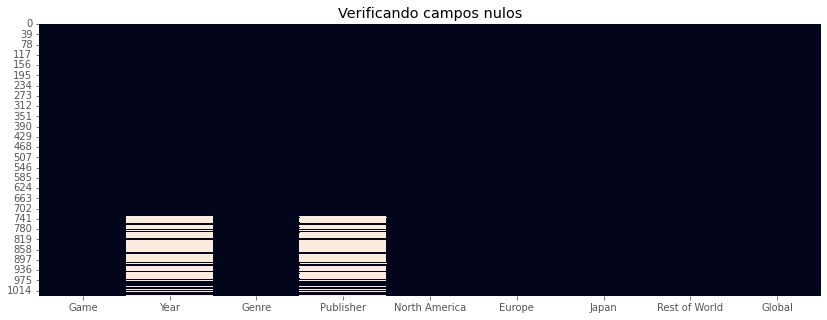

In [21]:
# Gráfico dos valores nulos
plt.figure( figsize=(14, 5) )
plt.title('Verificando campos nulos')
sns.heatmap( Base_Dados.isnull(), cbar=False );

In [22]:
# Retirando valores nulos
Base_Dados.dropna( inplace=True )

In [23]:
# analisando as estatíscas
Base_Dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


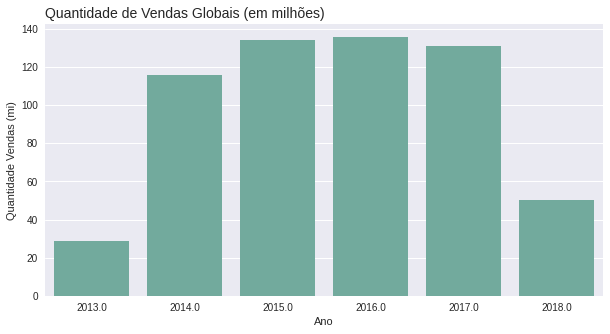

In [42]:
# Plotando um gráfico de barras
# Definindo o tamanho da imagem
plt.figure( figsize=(10, 5) )

# Adicionando o título
plt.title('Quantidade de Vendas Globais (em milhões)', loc='left', fontsize=14 )

# Definindo o gráfico
sns.barplot( data=Base_Dados, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum )

# Definindo o nome da label
plt.xlabel('Ano')
plt.ylabel('Quantidade Vendas (mi)');

In [25]:
# Retirando os anos
Base_Dados = Base_Dados.loc[ ( Base_Dados['Year'] != 2019 ) & ( Base_Dados['Year'] != 2020 ) ]

# Verificando a base de dados
Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


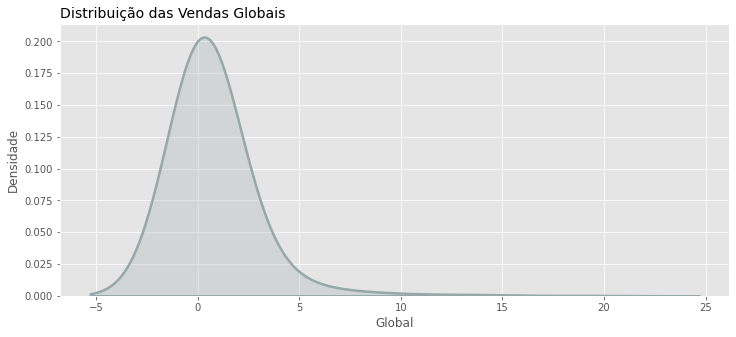

In [26]:
# Plotando um gráfico
plt.figure( figsize=(12, 5) )

plt.style.use('ggplot')

plt.title('Distribuição das Vendas Globais', loc='left', fontsize=14 )

sns.kdeplot( Base_Dados['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5 )
plt.ylabel('Densidade');

In [27]:
# Agrupando por ano
Base_Dados.groupby( by=['Year'] ).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


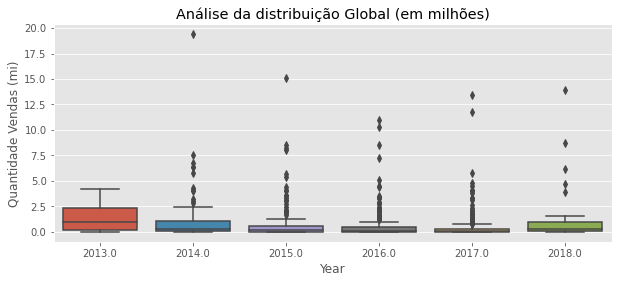

In [28]:
# Plotando um gráfico
plt.figure( figsize=(10, 4) )

plt.title('Análise da distribuição Global (em milhões)')

sns.boxplot( data=Base_Dados, x='Year', y='Global')
plt.ylabel('Quantidade Vendas (mi)') ;

In [29]:
# Analisando vendas acima de 10 milhões de unidades
Base_Dados.loc[ Base_Dados['Global'] >= 10 ]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [30]:
# Base de dados 
Base_Dados

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [31]:
Analise = Base_Dados.groupby( by=['Year'] ).sum().reset_index()

# analisando a proporção dos 100% de cada continemente comparado ao Total
America = [ America / Total * 100 for America, Total in zip( Analise['North America'], Analise['Global'] ) ]
Europa = [ Europa / Total * 100 for Europa, Total in zip( Analise['Europe'], Analise['Global'] ) ]
Japao = [ Japao / Total * 100 for Japao, Total in zip( Analise['Japan'], Analise['Global'] ) ]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip( Analise['Rest of World'], Analise['Global'] ) ]

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

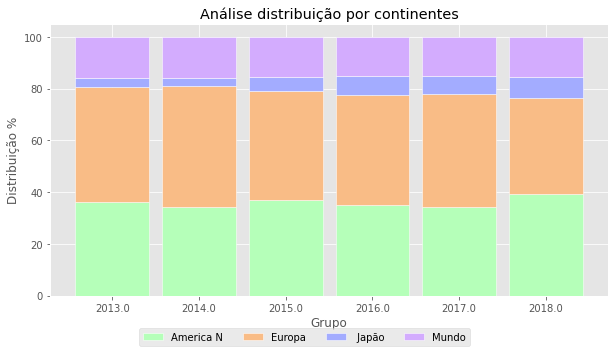

In [32]:
# Plotando um gráfico
plt.figure( figsize=(10, 5) )

# Largura barra no gráfico
Largura_Barra = 0.85
Rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]

plt.title('Análise distribuição por continentes')

# Plot da America
plt.bar( Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white' )

# Plot da Europa
plt.bar( Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white' )

# Plot do Japao
plt.bar( Grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa) ], width=Largura_Barra, color='#a3acff', edgecolor='white' )

# Plot do Resto do mundo
plt.bar( Grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=Largura_Barra, color='#d3acfe', edgecolor='white' )

# Definindo labels
plt.xticks( Grupos, Rotulos )
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# Adicionando legenda
plt.legend( ['America N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );

In [33]:
# Verificando os dados únicos
Base_Dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [34]:
# Transformando valores qualitativos em quantitativos
from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

Base_Dados['Produtor'] = Funcao_Label.fit_transform( Base_Dados['Publisher'] )
Base_Dados['Genero'] = Funcao_Label.fit_transform( Base_Dados['Genre'] )
Base_Dados['Jogo'] = Funcao_Label.fit_transform( Base_Dados['Game'] )

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [36]:
# Criando uma paleta de cores 
Paleta_Cores = sns.color_palette('husl', 8)
Paleta_Cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

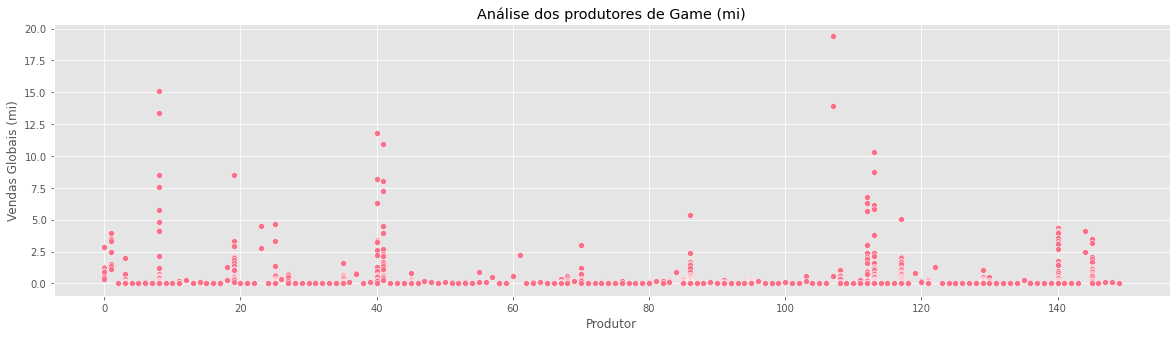

In [38]:
# Plotando um gráfico vendas por produtor
plt.figure( figsize=(20,5))
plt.title('Análise dos produtores de Game (mi)')
sns.scatterplot(data=Base_Dados, x='Produtor', y='Global', color=Paleta_Cores[0] )
plt.ylabel('Vendas Globais (mi)');

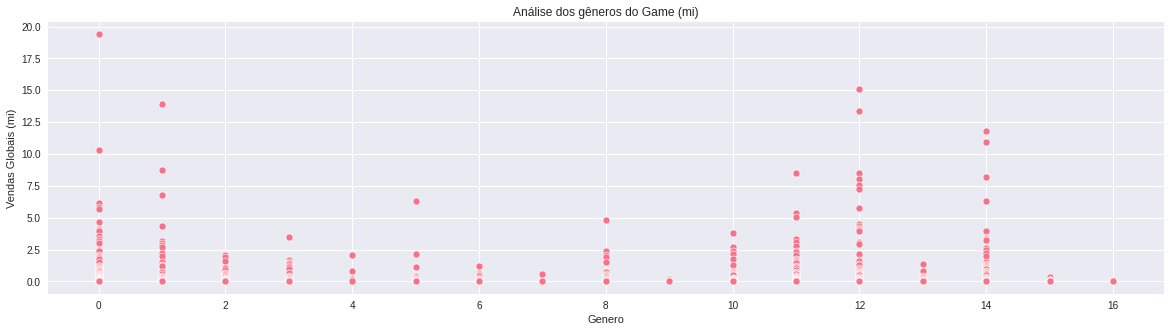

In [43]:
# Gráfico vendas por gênero
plt.figure( figsize=(20,5))
plt.title('Análise dos gêneros do Game (mi)')
sns.scatterplot(data=Base_Dados, x='Genero', y='Global', color=Paleta_Cores[0] )
plt.ylabel('Vendas Globais (mi)');

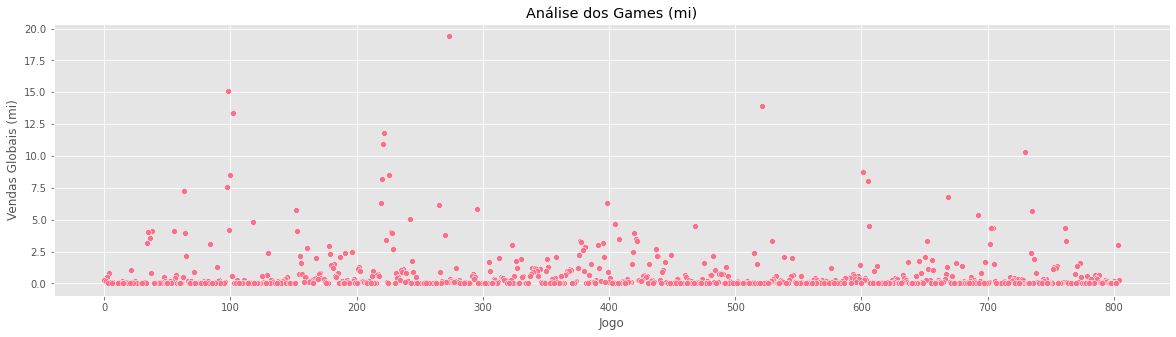

In [40]:
# Gráfico número de vendas cada jogo
plt.figure( figsize=(20,5))
plt.title('Análise dos Games (mi)')
sns.scatterplot(data=Base_Dados, x='Jogo', y='Global', color=Paleta_Cores[0] )
plt.ylabel('Vendas Globais (mi)');